### This notebook takes the standard neighborhood dataframe and creates boxplots for all cities together and for cities separately. These show the range of broadband adoption rates both between and within cities.

In [2]:
#importing libraries 

import geopandas as gpd
import warnings
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')

In [4]:
#neighborhood dataframe 
city_df = pd.read_csv("/tmp/data/standard_dataframes/standard_neighborhood_df.csv")

Unnamed: 0
City Name
Neighborhood Name
Number of Census Tracts
Population
Households
Neighborhood Size
% Black
% Hispanic
% >25 College Degree
Avg household income
% Broadband Access
% > 100MB Access
Devices per capita


In [5]:
city_df.head()

,Unnamed: 0,City Name,Neighborhood Name,Number of Census Tracts,Population,Households,Neighborhood Size,% Black,% Hispanic,% >25 College Degree,Avg household income,% Broadband Access,% > 100MB Access,Devices per capita
0,0,Seattle,2,1,5891.0,2387.0,0.000475,0.009,0.046,0.764,134554.0,0.972,0.598,0.020
1,1,Seattle,3,1,4536.0,1668.0,0.000359,0.027,0.044,0.879,208636.0,0.991,0.583,0.022
2,2,Seattle,5,1,9140.0,4526.0,0.000317,0.013,0.059,0.700,95182.0,0.915,0.774,0.028
3,3,Seattle,6,1,9140.0,4526.0,0.000317,0.013,0.059,0.700,95182.0,0.915,0.774,0.028
4,4,Seattle,7,1,5926.0,149.0,0.000392,0.055,0.069,0.478,17188.0,0.443,0.040,0.008


In [12]:
# helper functions to plot boxplots 

def neighborhood_boxplots(city_fcc_df, nhood_col, title):
    
    city_fcc_df.boxplot(column='f_broadband', by=nhood_col, figsize=(17,10), rot = 90, grid=False,
                       fontsize=8, color='#426A8C')
    plt.ylabel('f_broadband')
    plt.xlabel('Neighborhood')
    plt.title(title)
    plt.suptitle('')

In [118]:
def census_tract_boxplots(city_fcc_df, census_col, title):

    city_fcc_df.boxplot(column='f_broadband', by=census_col, figsize=(15,10), grid=False,
                       fontsize=8, color='green')
    plt.ylabel('f_broadband')
    plt.xlabel('Neighborhood')
    plt.title(title)
    plt.suptitle('')

In [140]:
def making_boxplots(city_fcc_df, nhood_col, title):
    
    city_fcc_df.boxplot(column='% Broadband Access', by=nhood_col, rot=90, figsize=(15,10), grid=False,
                       fontsize=8, color='#D94D1A')
    plt.ylabel('% Broadband Access')
    plt.xlabel('Cities')
    plt.title(title)
    plt.suptitle('')

# Plotting all cities in sd dataframe 

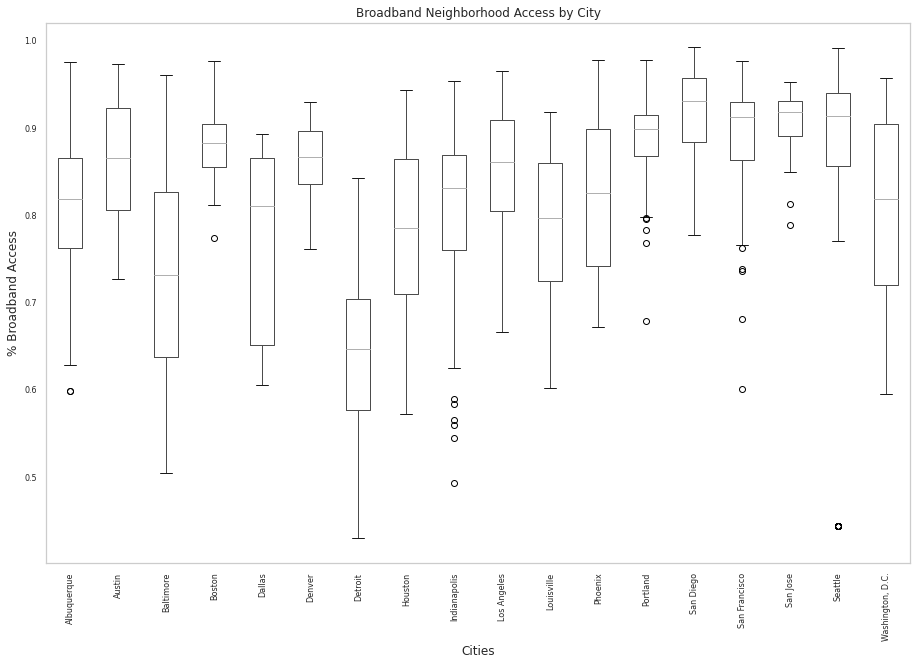

In [146]:
making_boxplots(city_df, 'City Name', 'Broadband Neighborhood Access by City')

In [32]:
# checking 10th percentile and 90th percentile 

def broadband_access (city): 
    
    df_city = city_df[city_df['City Name'] == city]
    df_city_broadband = df_city['% Broadband Access']
    array_city_broadband = np.array(df_city_broadband)
    Q_90 = np.quantile(array_city_broadband, 0.90) 
    Q_10 = np.quantile(array_city_broadband, 0.10)
    difference = Q_90 - Q_10
    
    return Q_90, Q_10, difference

In [34]:
results_iqr = []

for city in city_df['City Name'].unique():
    print(city, broadband_access(city))
    results_iqr.append(broadband_access(city))
    
iqr_broadband_df = pd.DataFrame({'City Name': city_df['City Name'].unique(), "IQR Broadband" : results_iqr})

Seattle (0.95605, 0.443, 0.51305)
Denver (0.9103999999999999, 0.8055666666666667, 0.10483333333333322)
Portland (0.943575, 0.8143250000000001, 0.12924999999999998)
Washington, D.C. (0.940275, 0.6718020833333334, 0.2684729166666666)
Boston (nan, nan, nan)
Albuquerque (0.896, 0.7079, 0.18810000000000004)
Houston (0.917188, 0.65821, 0.25897800000000004)
Indianapolis (0.8931222222222223, 0.6981423076923077, 0.1949799145299146)
Los Angeles (0.93235, 0.7427777777777778, 0.18957222222222225)
Phoenix (0.9565841642228738, 0.703287032967033, 0.25329713125584086)
San Francisco (0.94786, 0.8038333333333333, 0.14402666666666675)
Austin (0.9517333333333333, 0.7867000000000001, 0.16503333333333325)
Dallas (0.8915297385620915, 0.6098308108108108, 0.2816989277512807)
San Jose (0.9383333333333332, 0.867711956521739, 0.0706213768115942)
San Diego (0.9775333333333333, 0.8396622222222222, 0.13787111111111106)
Baltimore (0.8861333333333333, 0.5731999999999999, 0.3129333333333334)
Detroit (nan, nan, nan)
Lou

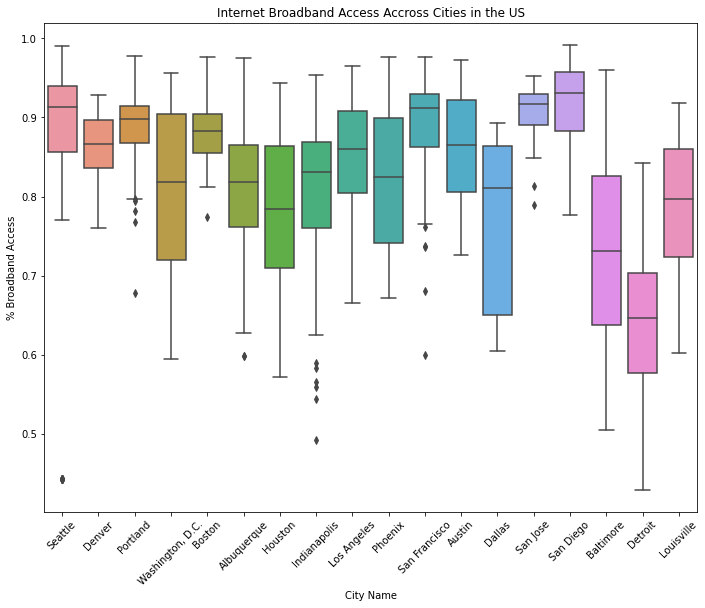

In [6]:
fig, ax = plt.subplots(figsize = (11.7 , 9))

sns.set(style='whitegrid')
 
sns.boxplot(x="City Name",
            y="% Broadband Access",
            data=city_df)

plt.xticks(rotation=45)
plt.title('Internet Broadband Access Accross Cities in the US')


plt.show
plt.savefig('/tmp/data/neighborhood-data/visuals/all_cities.png')

In [47]:
#subsetting three cities we want to examine 

three_cities = city_df[(city_df['City Name'] == 'Seattle') | (city_df['City Name'] == 'Baltimore') | (city_df['City Name'] == 'San Jose')]


In [51]:
#Three cities; equal versus unequal cities 

results_iqr = []

for city in three_cities['City Name'].unique():
    print(city, iqr_access(city))
    results_iqr.append(broadband_access(city))
    
iqr_broadband_df = pd.DataFrame({'City Name': three_cities['City Name'].unique(), "IQR Broadband" : results_iqr})

Seattle (0.9393, 0.8563571428571428, 0.08294285714285721)
San Jose (0.9299357142857143, 0.890235294117647, 0.039700420168067296)
Baltimore (0.8255, 0.6371625000000001, 0.18833749999999994)


<function matplotlib.pyplot.show(close=None, block=None)>

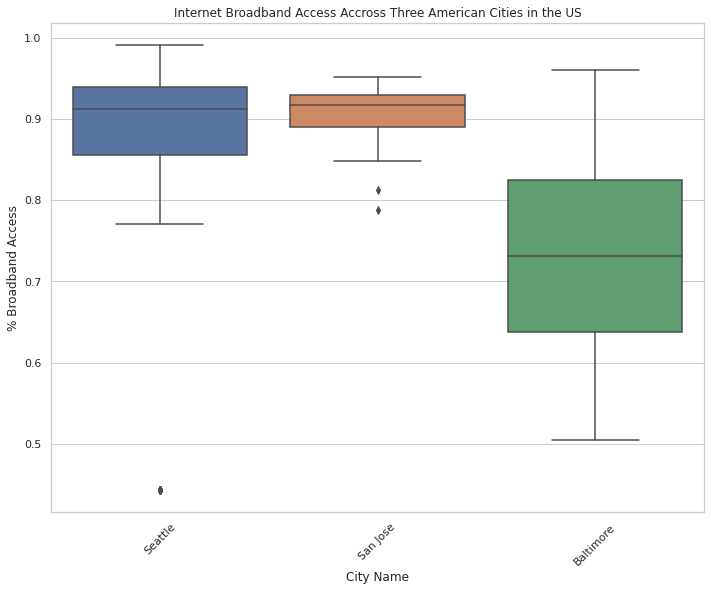

In [52]:
fig, ax = plt.subplots(figsize = (11.7 , 9))

sns.set(style='whitegrid')
 
sns.boxplot(x="City Name",
            y="% Broadband Access",
            data=three_cities)

plt.xticks(rotation=45)
plt.title('Internet Broadband Access Accross Three American Cities in the US')
plt.savefig('/tmp/data/neighborhood-data/visuals/three_cies.png')

plt.show

In [73]:
def whisker_plots (city_df, census_col, title):

    fig, ax = plt.subplots(figsize = (14 , 12)) 
    sns.set(style='whitegrid')
    sns.boxplot(x= census_col, y="f_broadband", data=city_df)
    plt.xticks(rotation=90)
    plt.xlabel('Neighborhood')
    plt.title(title)
    plt.show
    
    

# City One: Dallas

In [66]:
df_dallas = city_df[city_df['City Name'] == 'Dallas']
#standard_df_framework() to generate all the cities. 
#put all the visuals in one folder... send them to one folder(visuals)

In [47]:
df_dallas.head(2)

,Unnamed: 0,City Name,Neighborhood Name,Number of Census Tracts,Population,Households,Neighborhood Size,% Black,% Hispanic,% >25 College Degree,Avg household income,% Broadband Access,% > 100MB Access,Devices per capita
1385,0,Dallas,5,25,159097.0,45046.0,0.010077,0.272360,0.656680,0.06924,41952.080000,0.612400,0.531320,0.007960
1386,1,Dallas,1,31,161199.0,50923.0,0.010212,0.128774,0.707839,0.19029,52589.709677,0.746452,0.589065,0.014806


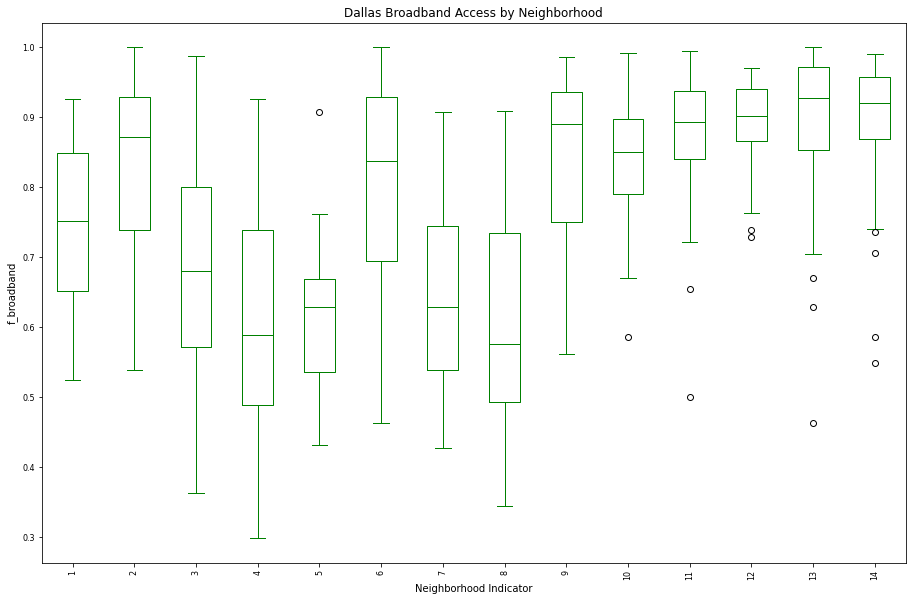

In [57]:
neighborhood_boxplots(dallas, 'COUNCIL', 'Dallas Broadband Access by Neighborhood')

# City 2: Seattle 

In [50]:
df_seattle = city_df[city_df['City Name'] == 'Seattle']

In [51]:
df_seattle.head(4)

,Unnamed: 0,City Name,Neighborhood Name,Number of Census Tracts,Population,Households,Neighborhood Size,% Black,% Hispanic,% >25 College Degree,Avg household income,% Broadband Access,% > 100MB Access,Devices per capita
0,0,Seattle,2,1,5891.0,2387.0,0.000475,0.009,0.046,0.764,134554.0,0.972,0.598,0.020
1,1,Seattle,3,1,4536.0,1668.0,0.000359,0.027,0.044,0.879,208636.0,0.991,0.583,0.022
2,2,Seattle,5,1,9140.0,4526.0,0.000317,0.013,0.059,0.700,95182.0,0.915,0.774,0.028
3,3,Seattle,6,1,9140.0,4526.0,0.000317,0.013,0.059,0.700,95182.0,0.915,0.774,0.028


In [10]:
seattle_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/seattle/city-merged.geojson')
seattle_df.head()

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,L_HOOD,L_HOODID,SYMBOL,SYMBOL2,AREA,HOODS_,HOODS_ID,SHAPE_Leng,SHAPE_Area,geometry
0,53033011300,2.871,2.635,2.094,1.953,0.941,0.941,1000.000,886.765,0.777,...,NO BROADER TERM,18,12,9,29423452.0,71,187,30433.404869,2.942345e+07,"POLYGON ((-122.35512 47.52103, -122.35510 47.5..."
1,53033026500,2.943,2.386,1.957,1.814,0.814,0.800,1000.000,759.929,0.748,...,NO BROADER TERM,18,12,9,29423452.0,71,187,30433.404869,2.942345e+07,"POLYGON ((-122.35516 47.51738, -122.34387 47.5..."
2,53033011200,2.522,2.370,1.696,1.609,0.685,0.674,858.837,644.457,0.807,...,NO BROADER TERM,18,12,9,29423452.0,71,187,30433.404869,2.942345e+07,"POLYGON ((-122.33918 47.54014, -122.33507 47.5..."
3,53033026400,2.775,2.213,1.787,1.596,0.674,0.674,867.657,640.787,0.867,...,NO BROADER TERM,18,12,9,29423452.0,71,187,30433.404869,2.942345e+07,"POLYGON ((-122.33150 47.52096, -122.32959 47.5..."
4,53033010800,3.167,2.909,2.364,1.576,0.773,0.773,821.818,737.727,0.904,...,NO BROADER TERM,18,12,9,29423452.0,71,187,30433.404869,2.942345e+07,"POLYGON ((-122.36551 47.55932, -122.36158 47.5..."


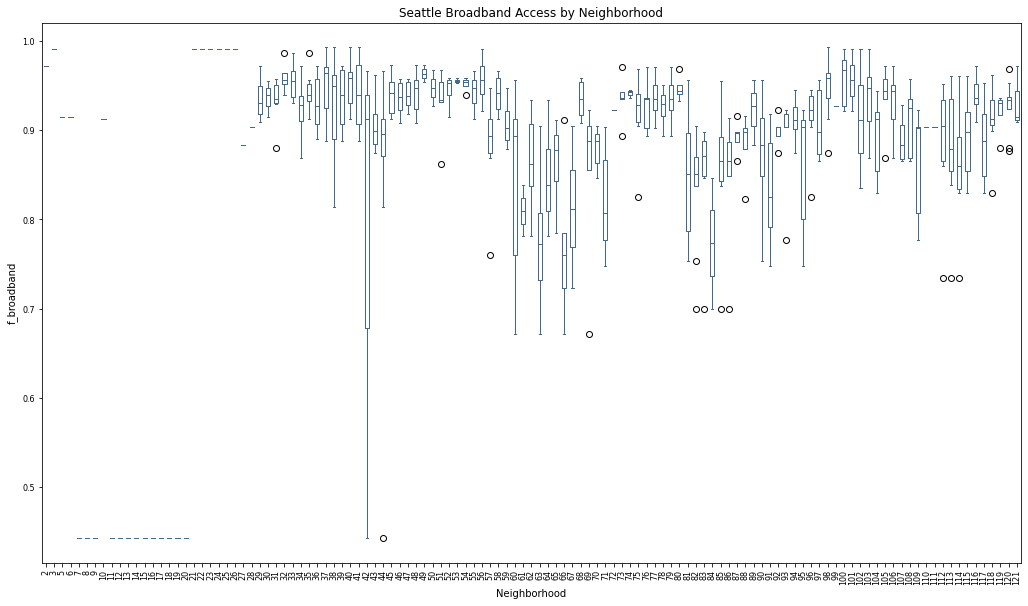

In [13]:
neighborhood_boxplots(seattle_df, 'HOODS_', 'Seattle Broadband Access by Neighborhood')

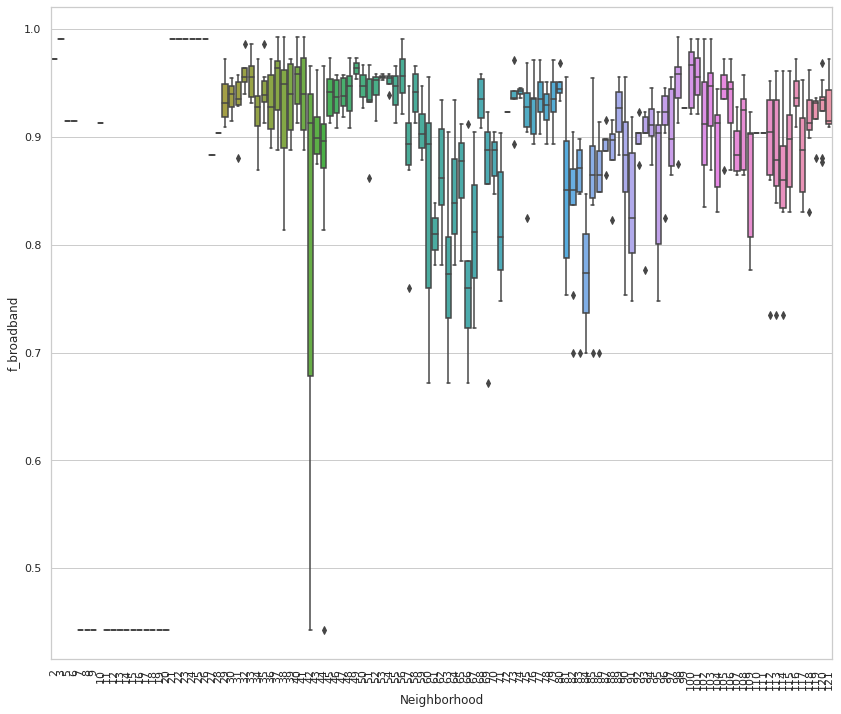

In [70]:
whisker_plots(seattle_df, 'HOODS_', 'Seattle Broadband Access by Neighborhood', "Seattle")
plt.savefig('/tmp/data/neighborhood-data/visuals/Seattle.png')

# City 3 Denver 

In [14]:
denver_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/denver/city-merged.geojson')
denver_df.head()

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,u_mbps,lat_ms,tests_per_cap,devices_per_cap,index_right,NBHD_ID,NBHD_NAME,TYPOLOGY,NOTES,geometry
0,08031004103,6.558,6.385,4.154,2.837,0.913,0.913,1000.0,1000.0,0.917,...,145.40,8.59,0.087,0.024,29,48,North Park Hill,None,None,"POLYGON ((-104.94051 39.75467, -104.94051 39.7..."
1,08031004201,7.491,7.438,4.545,2.598,0.795,0.795,1000.0,982.5,0.915,...,133.43,9.64,0.085,0.023,29,48,North Park Hill,None,None,"POLYGON ((-104.94059 39.74739, -104.94058 39.7..."
2,08031004202,6.777,6.694,4.107,2.793,0.893,0.893,1000.0,1000.0,0.925,...,140.29,9.99,0.104,0.025,29,48,North Park Hill,None,None,"POLYGON ((-104.92228 39.74373, -104.92228 39.7..."
3,08031003602,7.086,6.839,4.247,2.903,0.946,0.946,1000.0,1000.0,0.805,...,138.10,8.66,0.030,0.013,29,48,North Park Hill,None,None,"POLYGON ((-104.95975 39.76816, -104.95973 39.7..."
4,08031004102,6.053,5.850,3.442,2.327,0.628,0.628,1000.0,1000.0,0.719,...,118.55,8.69,0.032,0.017,29,48,North Park Hill,None,None,"POLYGON ((-104.92231 39.76561, -104.92229 39.7..."


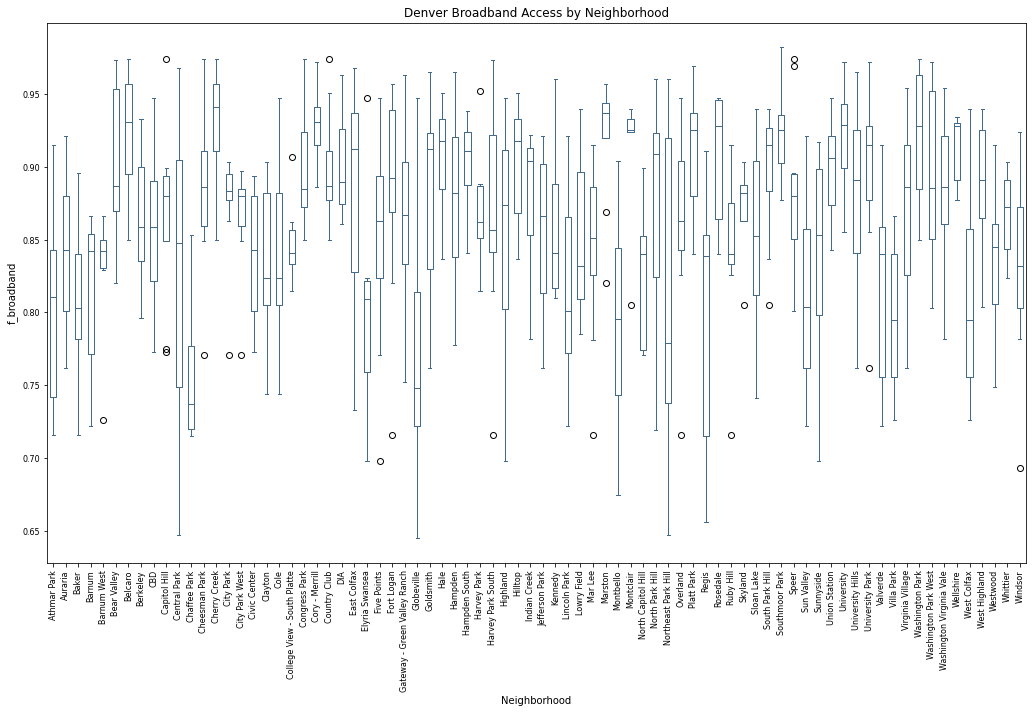

In [15]:
neighborhood_boxplots(denver_df, 'NBHD_NAME', 'Denver Broadband Access by Neighborhood')

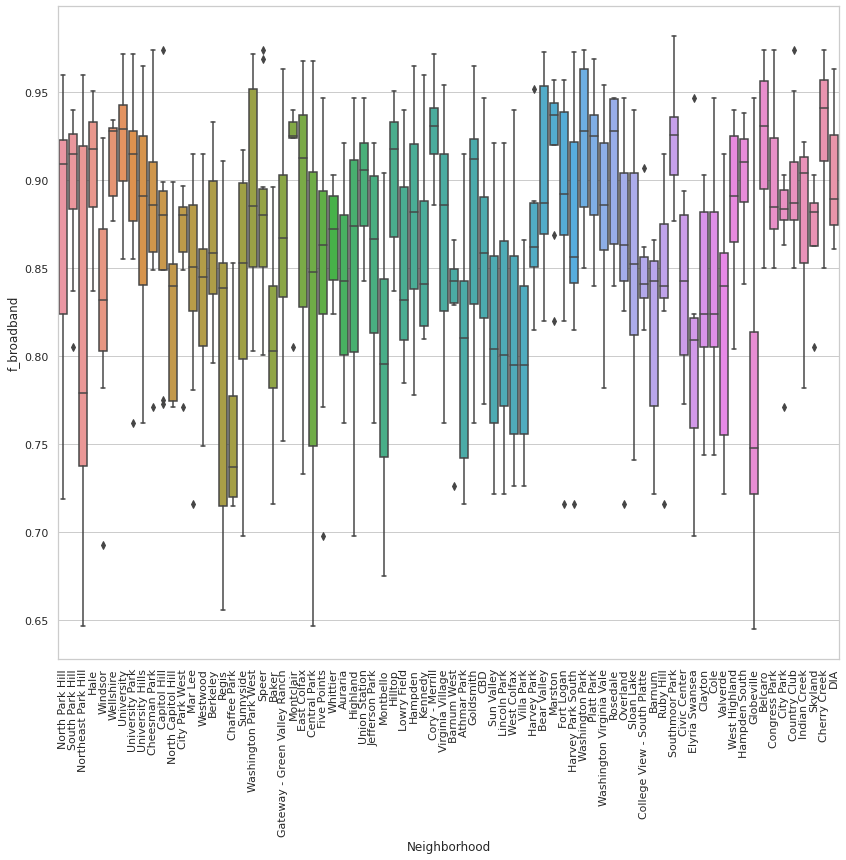

In [72]:
whisker_plots(denver_df, 'NBHD_NAME', 'Denver Broadband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/Denver_whisker_plot.png')

# City 4 Boston 

In [16]:
boston_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/boston/city-merged.geojson')
boston_df.head()

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,devices_per_cap,index_right,OBJECTID,Name,Acres,Neighborho,SqMiles,ShapeSTAre,ShapeSTLen,geometry
0,25025070101,3.049,3.000,1.321,1.054,0.125,0.125,617.609,196.141,0.930,...,0.037,5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.06424 42.35339, -71.06331 42.355..."
1,25025070101,3.049,3.000,1.321,1.054,0.125,0.125,617.609,196.141,0.930,...,0.037,6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.06424 42.35339, -71.06331 42.355..."
2,25025070200,3.829,3.829,1.800,1.229,0.257,0.257,868.571,291.143,0.817,...,0.016,6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.06649 42.34899, -71.06687 42.350..."
3,25025070402,2.970,2.848,1.333,1.121,0.333,0.333,506.970,335.758,0.855,...,0.033,6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.06850 42.34760, -71.06819 42.347..."
4,25025070300,4.250,4.208,2.062,1.438,0.354,0.354,861.458,372.500,0.948,...,0.023,6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.07525 42.34588, -71.07353 42.347..."


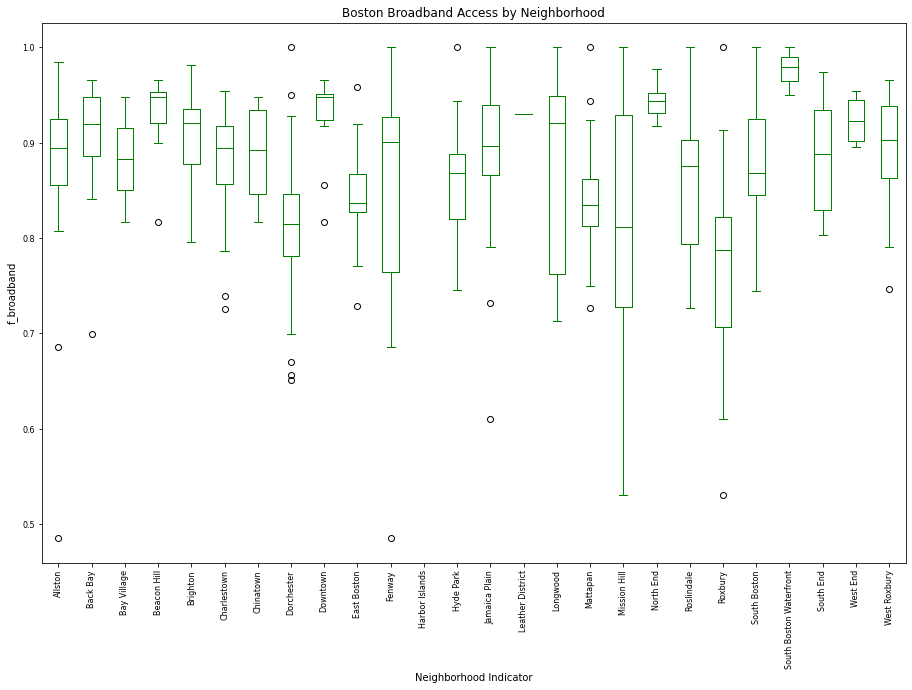

In [78]:
neighborhood_boxplots(boston_df, 'Name', 'Boston Broadband Access by Neighborhood')

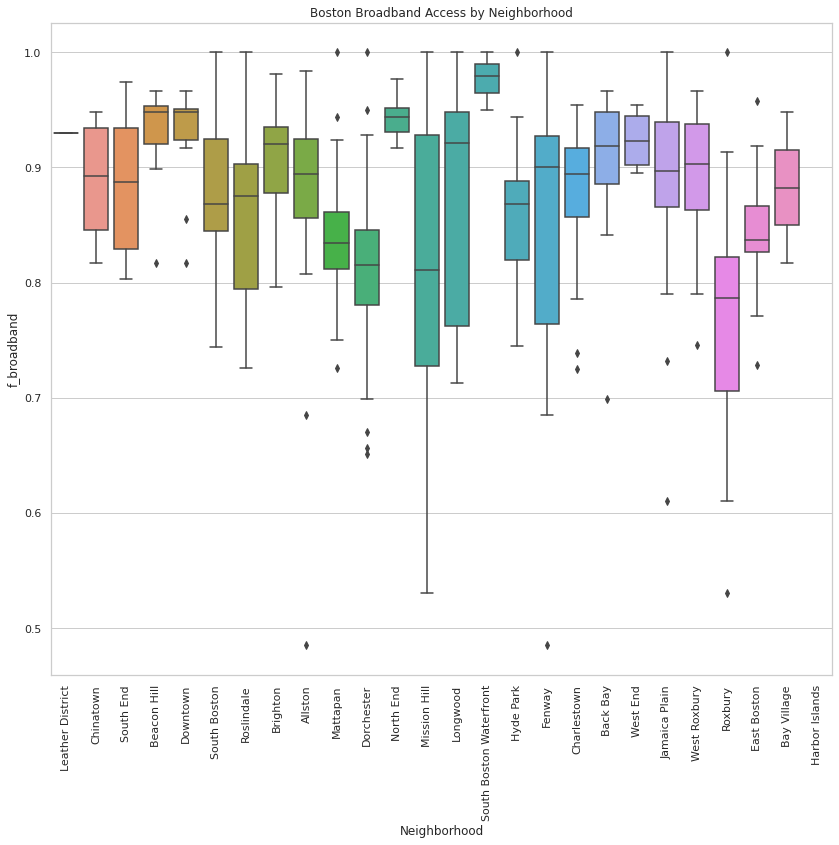

In [74]:
whisker_plots(boston_df, 'Name', 'Boston Broadband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/boston_whisker_plot.png')

# City 5 Portland 

In [17]:
portland_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/portland/city-merged.geojson')
portland_df.head()

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,Shape_Leng,MAPLABEL,ID,geometry
0,41051004200,2.877,2.877,1.825,1.693,0.789,0.789,908.333,750.860,0.934,...,4,CATHEDRAL PARK,None,N,NPNS,HORZ,11434.254777,Cathedral Park,4,"POLYGON ((-122.77716 45.59797, -122.77033 45.6..."
1,41051004300,2.528,2.372,0.693,0.673,0.191,0.191,539.598,204.045,0.892,...,4,CATHEDRAL PARK,None,N,NPNS,HORZ,11434.254777,Cathedral Park,4,"POLYGON ((-122.83337 45.60564, -122.82997 45.6..."
2,41051004101,2.405,2.343,1.248,1.224,0.562,0.562,668.714,538.357,0.908,...,4,CATHEDRAL PARK,None,N,NPNS,HORZ,11434.254777,Cathedral Park,4,"POLYGON ((-122.78014 45.61950, -122.77956 45.6..."
3,41051004102,3.259,3.209,1.906,1.899,0.935,0.935,972.014,881.835,0.856,...,4,CATHEDRAL PARK,None,N,NPNS,HORZ,11434.254777,Cathedral Park,4,"POLYGON ((-122.75104 45.58899, -122.74925 45.5..."
4,41051004002,3.164,2.963,1.758,1.754,0.873,0.873,894.037,826.434,0.919,...,4,CATHEDRAL PARK,None,N,NPNS,HORZ,11434.254777,Cathedral Park,4,"POLYGON ((-122.74083 45.58219, -122.73588 45.5..."


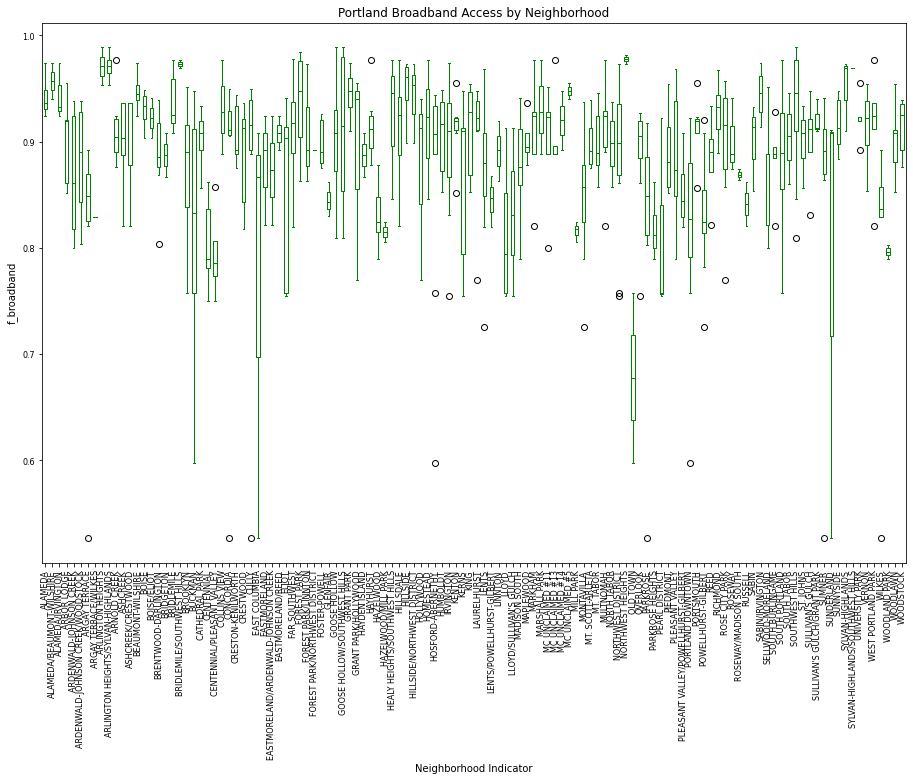

In [82]:
neighborhood_boxplots(portland_df, 'NAME', 'Portland Broadband Access by Neighborhood')

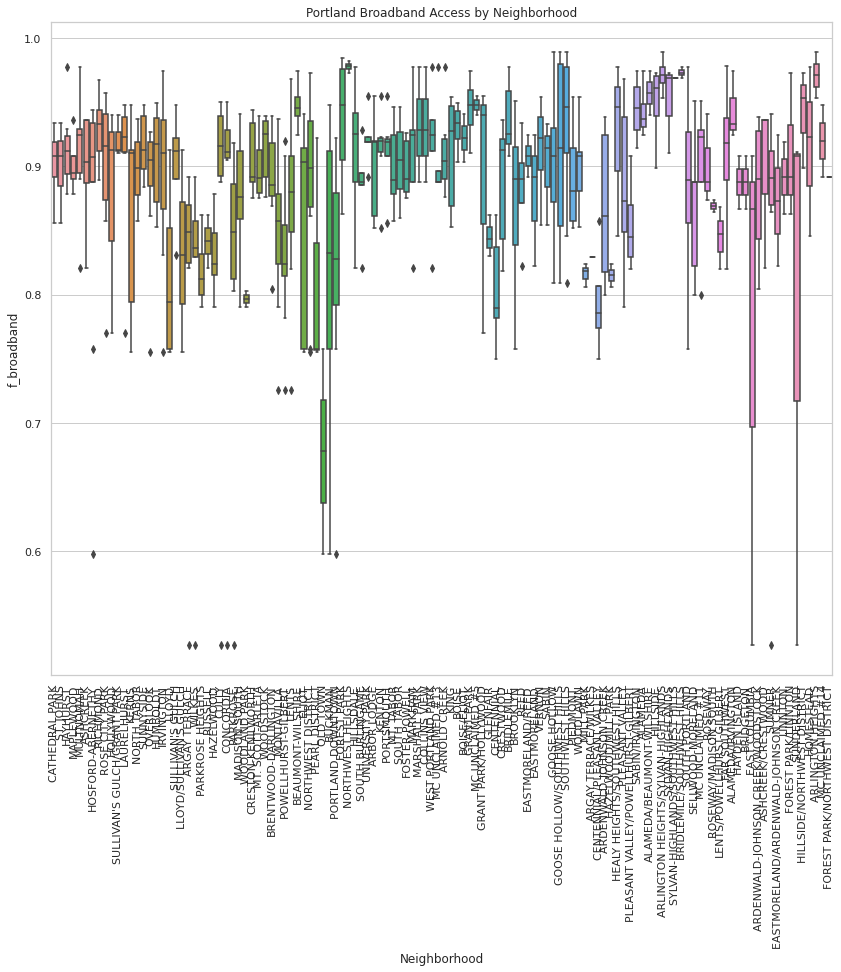

In [75]:
whisker_plots(portland_df, 'NAME', 'Portland Broadband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/portland_whisker_plot.png')

# City 6 Washington 

In [19]:
dc_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/washington-dc/city-merged.geojson')
dc_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,11001009509,4.321,3.500,3.393,3.393,1.000,1.000,995.714,880.000,0.748,...,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",Original,{93A3CDAB-DAD8-415D-B4F6-F74133CB56F9},None,None,None,None,0,0,"POLYGON ((-77.00201 38.95105, -76.99905 38.951..."
1,11001009507,4.364,3.455,3.455,3.455,0.909,0.909,1000.000,803.182,0.708,...,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",Original,{93A3CDAB-DAD8-415D-B4F6-F74133CB56F9},None,None,None,None,0,0,"POLYGON ((-77.00229 38.95677, -76.99973 38.960..."


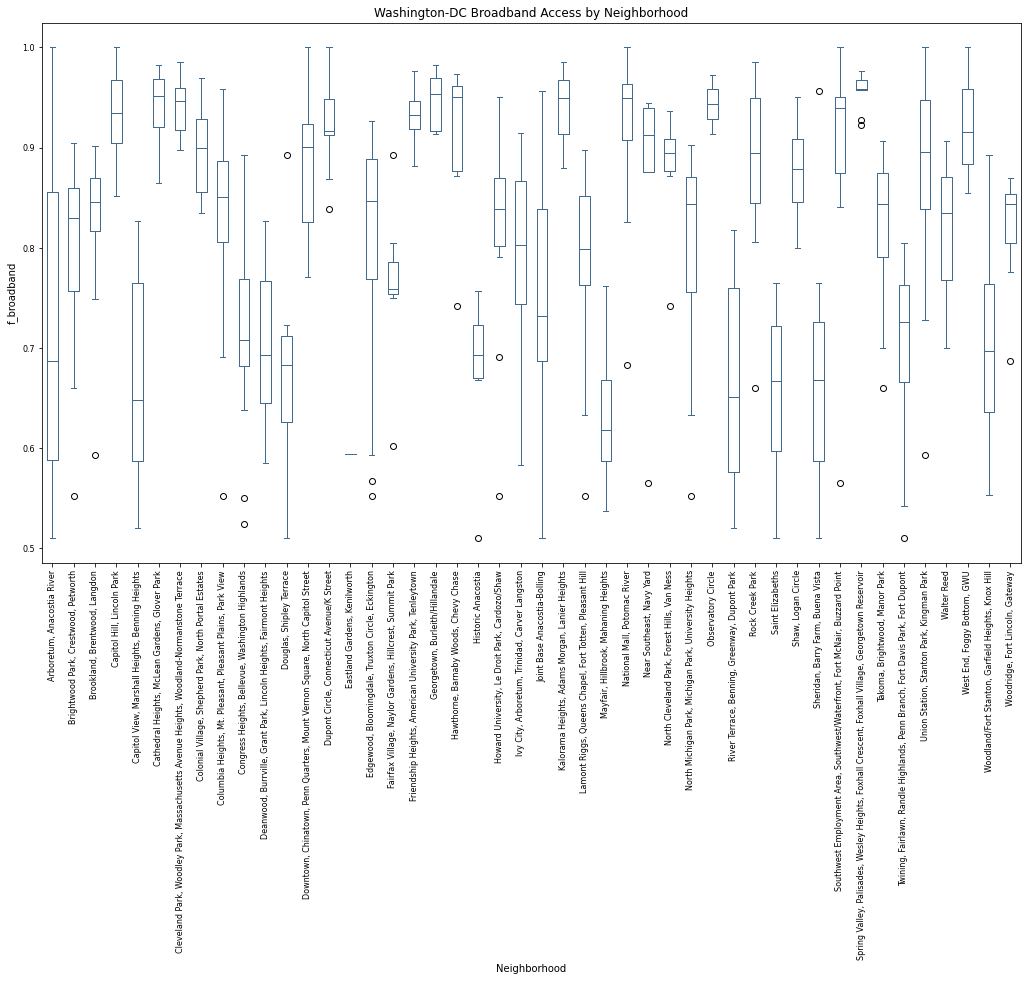

In [20]:
neighborhood_boxplots(dc_df, 'NBH_NAMES', 'Washington-DC Broadband Access by Neighborhood')

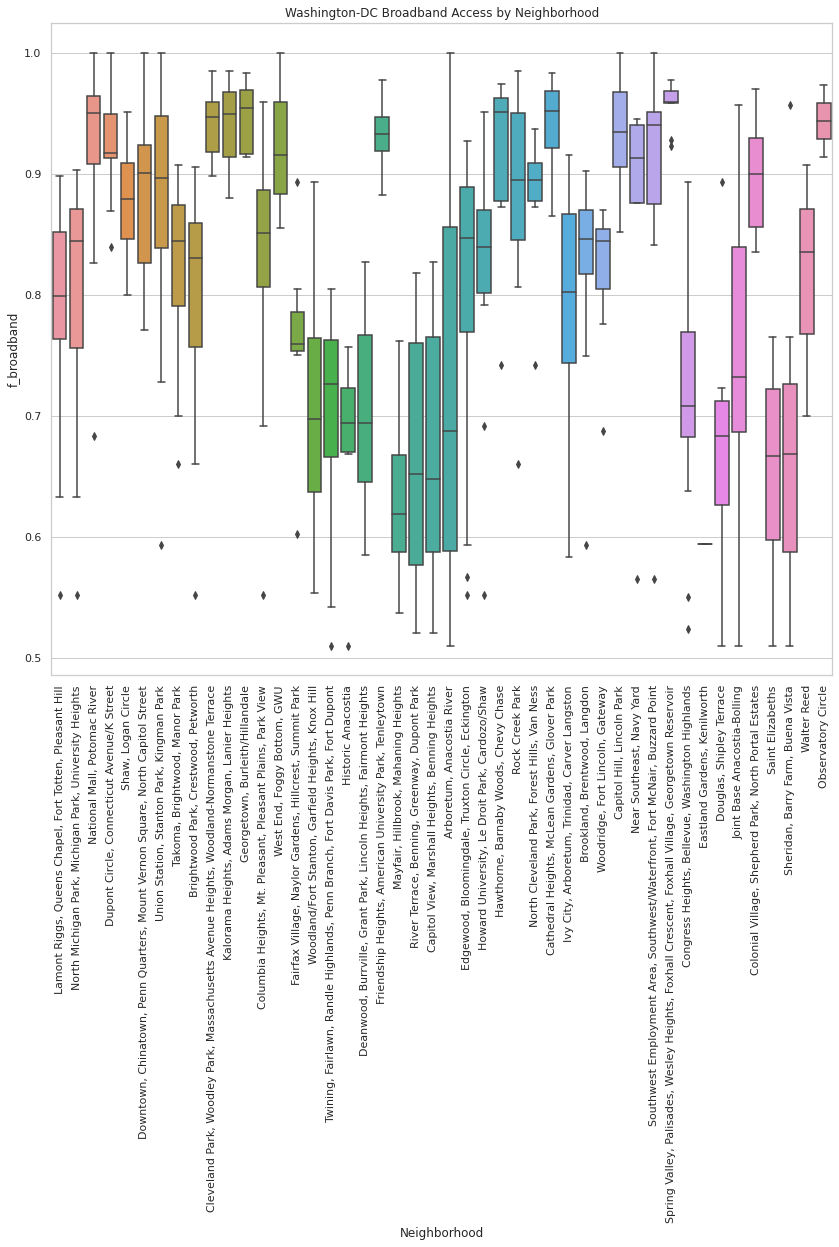

In [76]:
whisker_plots(dc_df, 'NBH_NAMES', 'Washington-DC Broadband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/washington_dc_whisker_plot.png')

# City 7 Austin  

In [22]:
austin_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/austin/city-merged.geojson')
austin_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,devices_per_cap,index_right,fid,target_fid,neighname,sqmiles,shape_leng,shape_area,shape_le_2,geometry
0,48453002412,4.232,4.179,3.107,2.679,0.643,0.643,978.571,655.357,0.789,...,0.006,19,47.0,47.0,MCKINNEY,2.669332,54925.795709,7.441671e+07,54925.795709,"POLYGON ((-97.76135 30.19429, -97.75973 30.196..."
1,48453002307,4.405,4.189,2.838,2.486,1.459,0.865,991.892,869.595,0.792,...,0.015,19,47.0,47.0,MCKINNEY,2.669332,54925.795709,7.441671e+07,54925.795709,"POLYGON ((-97.74746 30.22329, -97.74534 30.226..."


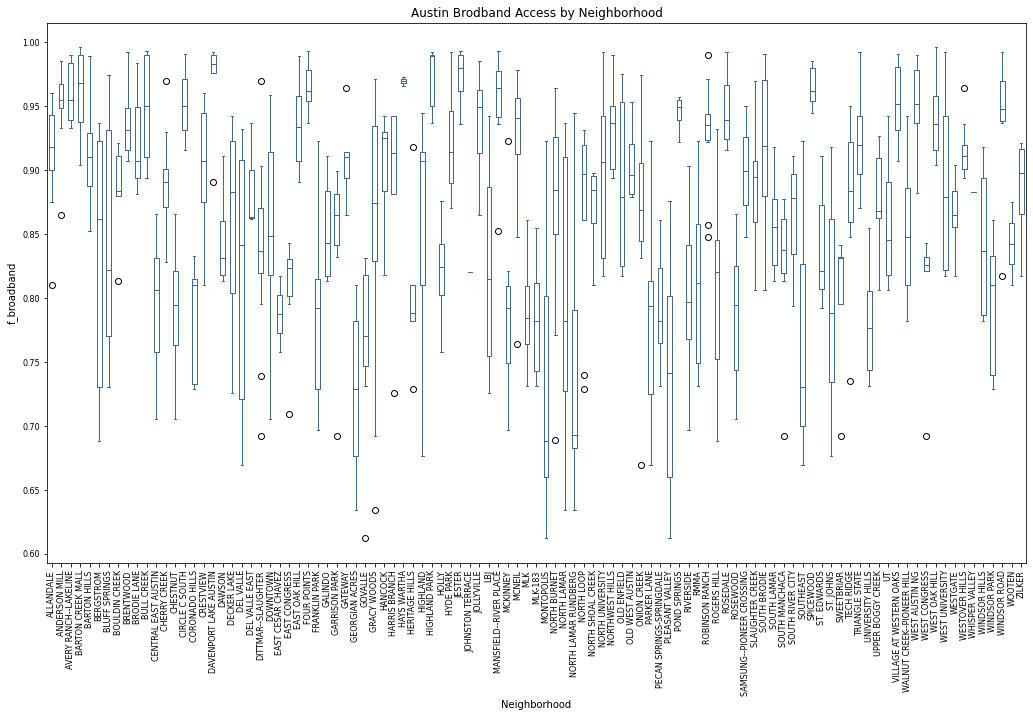

In [23]:
neighborhood_boxplots(austin_df, 'neighname', 'Austin Brodband Access by Neighborhood')

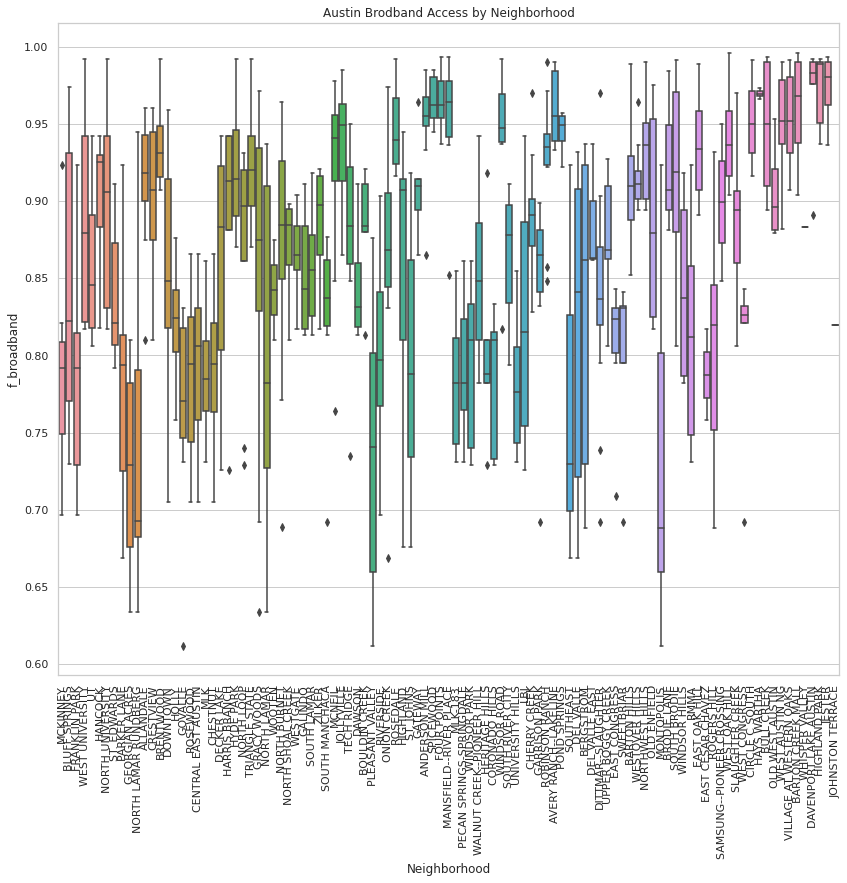

In [77]:
whisker_plots(austin_df, 'neighname', 'Austin Brodband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/austin_whisker_plot.png')

# City 8 San-Diego

In [27]:
san_diego_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/san-diego/city-merged.geojson')
san_diego_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,u_mbps,lat_ms,tests_per_cap,devices_per_cap,index_right,objectid,cpcode,cpname,acreage,geometry
0,06073008330,3.276,3.034,1.690,1.069,0.069,0.069,944.138,101.552,0.991,...,23.98,22.23,0.052,0.021,21,22,21,Carmel Valley,4525.44374,"POLYGON ((-117.22971 32.95555, -117.22773 32.9..."
1,06073008327,3.192,2.827,1.615,1.019,0.000,0.000,941.154,53.558,0.971,...,23.65,20.29,0.109,0.032,21,22,21,Carmel Valley,4525.44374,"POLYGON ((-117.25322 32.97996, -117.24660 32.9..."


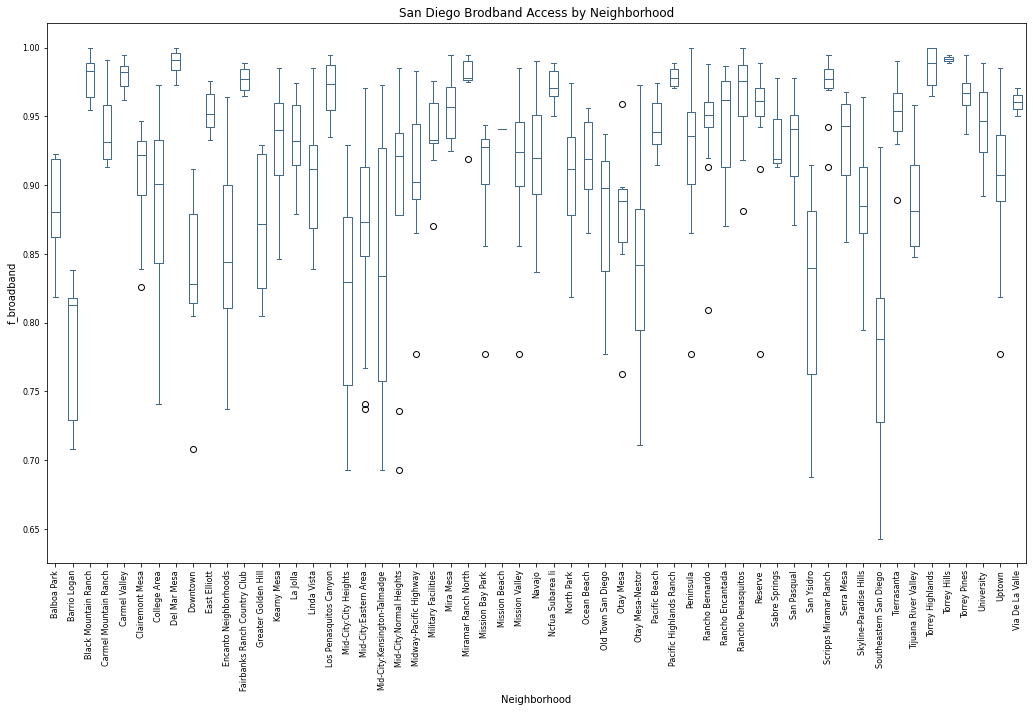

In [26]:
neighborhood_boxplots(san_diego_df, 'cpname', 'San Diego Brodband Access by Neighborhood')

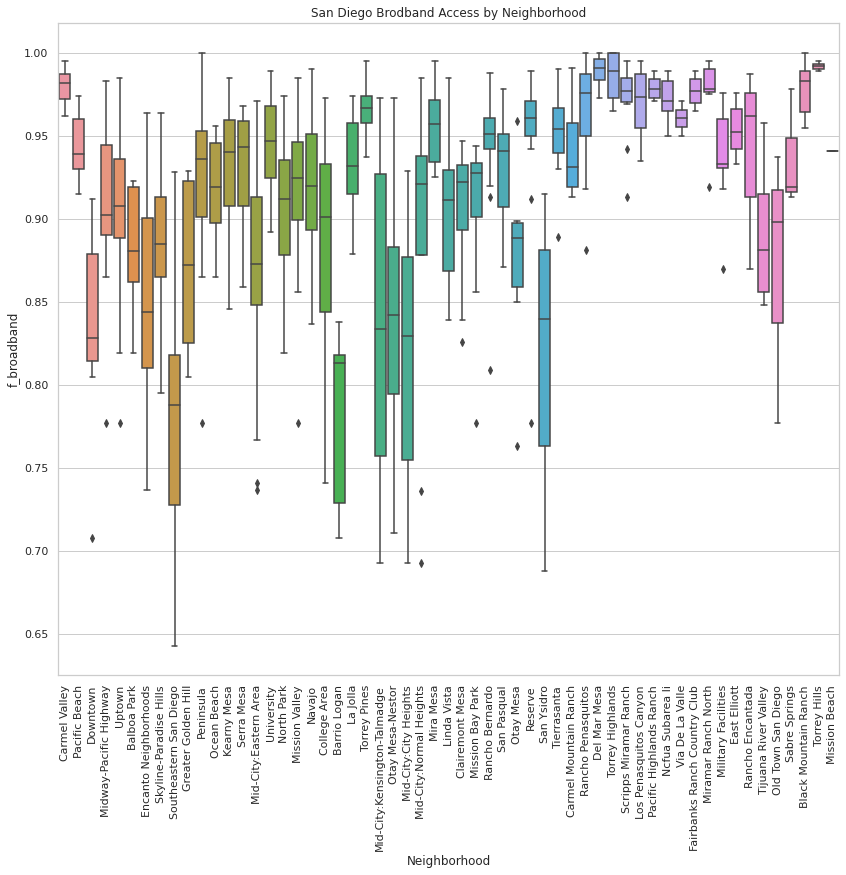

In [78]:
whisker_plots(san_diego_df, 'cpname', 'San Diego Brodband Access by Neighborhood')
plt.savefig('/tmp/neighborhood-data/visuals/san_diego_whisker_plot.png')

# City 9 Albuquerque

In [29]:
# albuquerque_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/albuquerque/city-merged.geojson')
# albuquerque_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,created_da,last_edite,last_edi_1,CityCounci,GlobalID,d_Status,d_Recognit,d_Type,d_NotifyLi,geometry
0,35001002402,6.654,6.433,2.462,2.019,0.029,0.029,1000.0,1000.0,0.700,...,2018-02-13,AGSRET,2019-06-28,3,{B40F3EBA-B69E-4687-B252-2DD5F275805E},Active,Recognized,Neighborhood Association,Not Applicable,"POLYGON ((-106.71082 35.08312, -106.71075 35.0..."
1,35001002300,6.257,6.219,2.055,1.852,0.004,0.004,1000.0,1000.0,0.651,...,2018-02-13,AGSRET,2019-06-28,3,{B40F3EBA-B69E-4687-B252-2DD5F275805E},Active,Recognized,Neighborhood Association,Not Applicable,"POLYGON ((-106.70095 35.06792, -106.69869 35.0..."


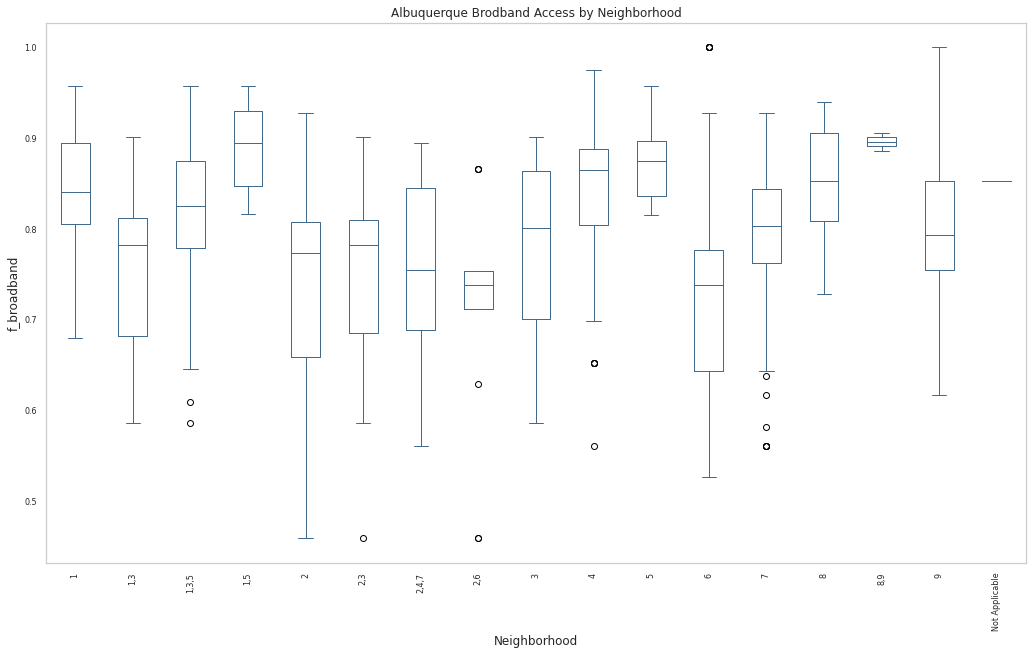

In [79]:
# neighborhood_boxplots(albuquerque_df, 'CityCounci', 'Albuquerque Brodband Access by Neighborhood')

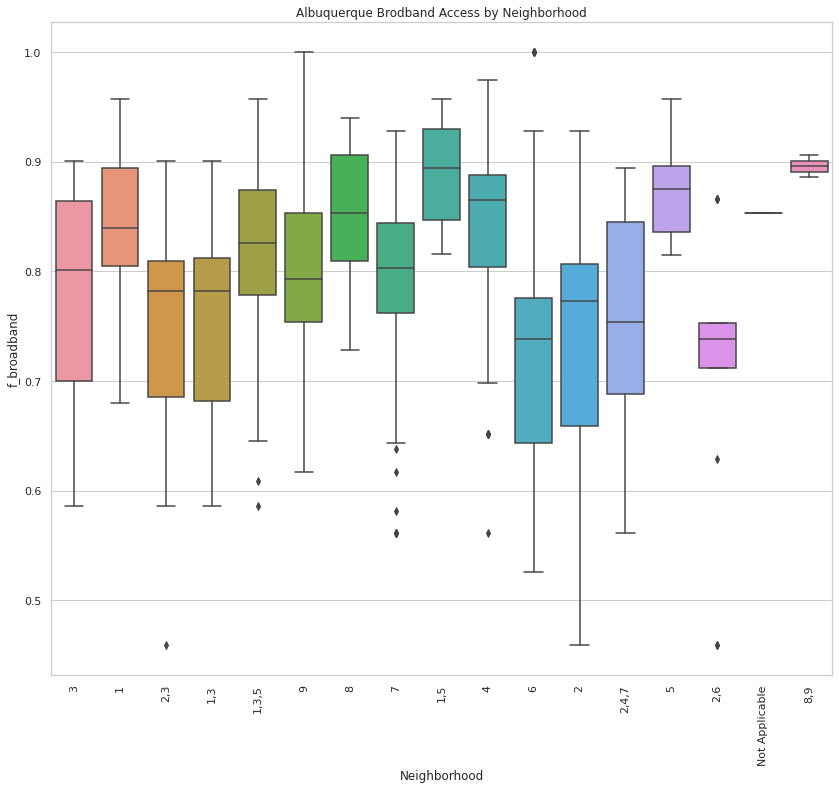

In [80]:
# whisker_plots(albuquerque_df, 'CityCounci', 'Albuquerque Brodband Access by Neighborhood')
# plt.savefig('/tmp/neighborhood-data/visuals/albuquerque_whisker_plot.png')

# City 10 Houston 

In [35]:
houston_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/houston/city-merged.geojson')
houston_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,cohgis_C_1,COUNCIL_AC,RECOGNITIO,SnbrInfoUR,WeCan,Top10,CEA_FLAG,ShapeSTAre,ShapeSTLen,geometry
0,48201311900,2.810,2.619,1.476,1.175,0.190,0.190,919.444,217.460,0.728,...,0,None,None,http://www.houstontx.gov/superneighborhoods/69...,Y,None,Y,7.894067e+07,44697.039366,"POLYGON ((-95.33319 29.72589, -95.32866 29.722..."
1,48201311800,2.603,2.143,1.524,1.397,0.492,0.492,901.659,507.222,0.745,...,0,None,None,http://www.houstontx.gov/superneighborhoods/69...,Y,None,Y,7.894067e+07,44697.039366,"POLYGON ((-95.33292 29.71437, -95.33107 29.712..."


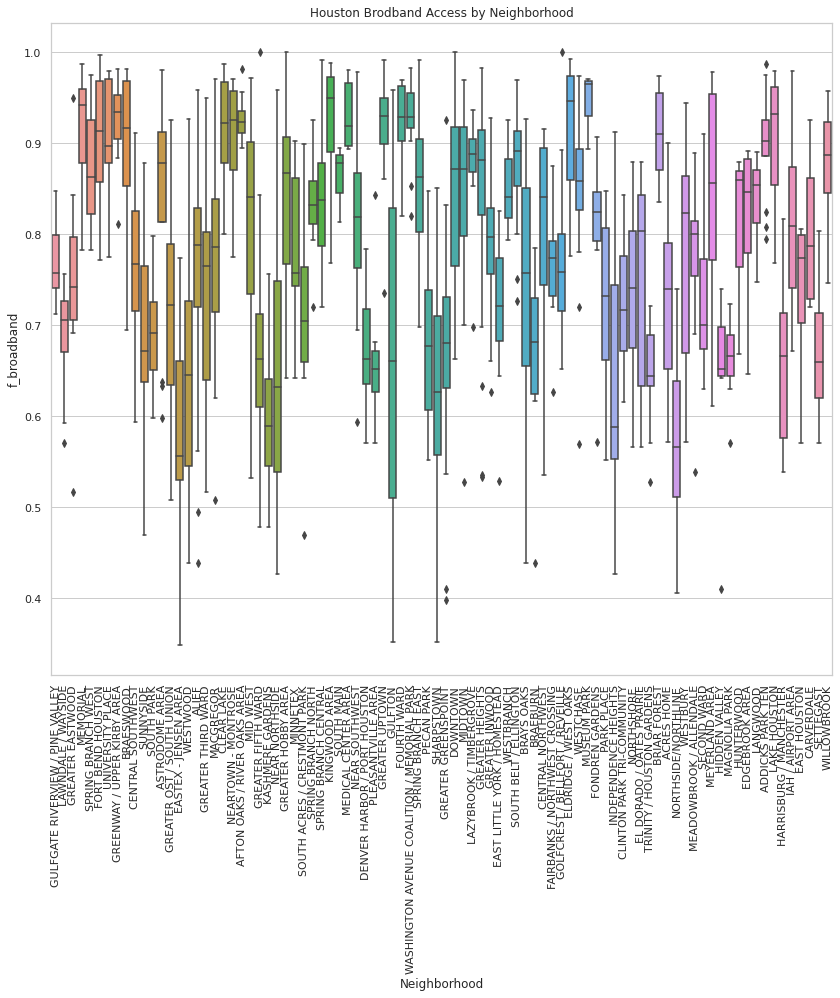

In [81]:
whisker_plots(houston_df, 'SNBNAME', 'Houston Brodband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/houston_whisker_plot.png')

## City 11: Louisville

In [38]:
louisville_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/louisville/city-merged.geojson')
louisville_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,lat_ms,tests_per_cap,devices_per_cap,index_right,OBJECTID,NH_CODE,NH_NAME,SHAPEAREA,SHAPELEN,geometry
0,21111012302,3.76,3.76,1.60,1.24,0.24,0.24,954.4,266.6,0.866,...,32.43,0.039,0.016,80,81,34,HAZELWOOD,1.789941e+07,21086.576464,"POLYGON ((-85.82929 38.15719, -85.82586 38.162..."
1,21111004301,2.76,1.98,1.58,1.58,0.58,0.58,974.8,594.7,0.647,...,24.30,0.010,0.005,80,81,34,HAZELWOOD,1.789941e+07,21086.576464,"POLYGON ((-85.80533 38.19019, -85.80801 38.192..."


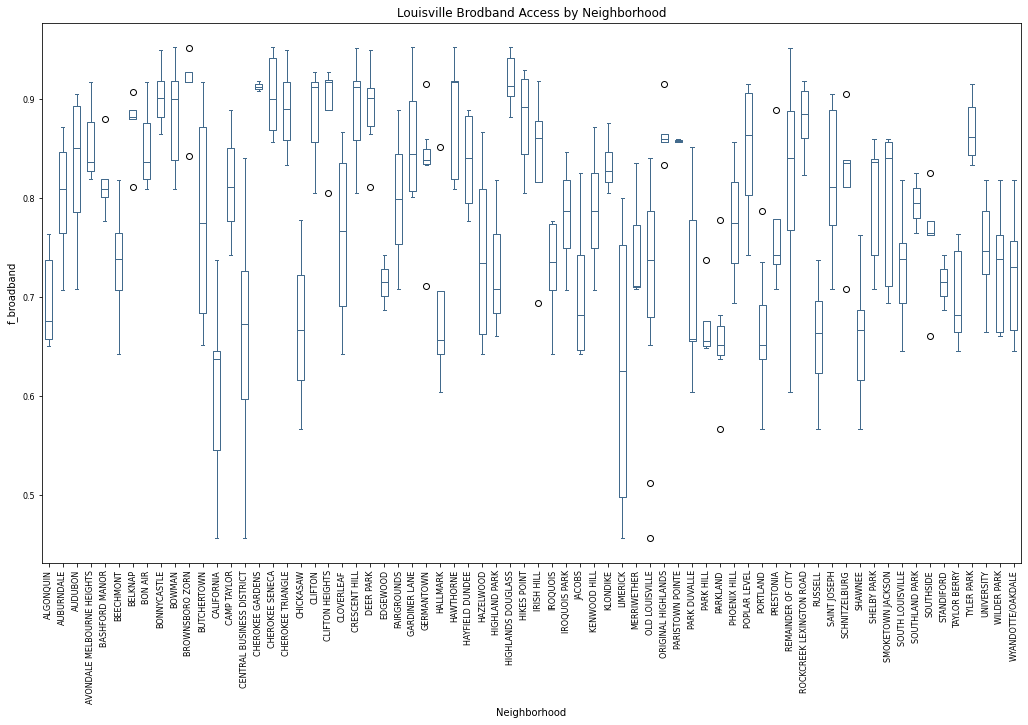

In [40]:
neighborhood_boxplots(louisville_df, 'NH_NAME', 'Louisville Brodband Access by Neighborhood')

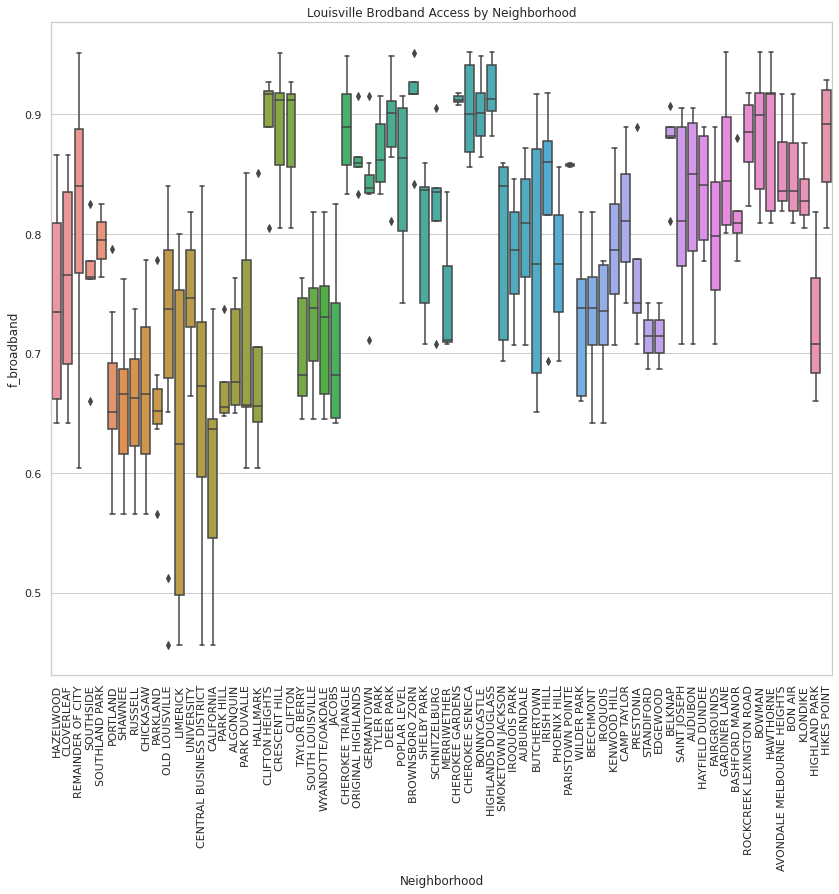

In [82]:
whisker_plots(louisville_df, 'NH_NAME', 'Louisville Brodband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/louisville_whisker_plot.png')

## City 12: Baltimore

In [45]:
baltimore_df = gpd.read_file('/tmp/data/boundary-shapefiles/city-boundaries/baltimore/city-merged.geojson')
baltimore_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,HH_chng,AveHHsize,created_us,created_da,last_edite,last_edi_1,Shape_Leng,Shape__Are,Shape__Len,geometry
0,24510260202,2.131,1.44,0.976,0.976,0.0,0.0,976.31,34.167,0.722,...,-8.0,2.67316,None,None,None,None,12268.078903,6.302177e+06,12268.078903,"POLYGON ((-76.56596 39.32773, -76.56412 39.329..."
1,24510270101,2.440,1.64,0.920,0.920,0.0,0.0,920.48,32.200,0.846,...,-8.0,2.67316,None,None,None,None,12268.078903,6.302177e+06,12268.078903,"POLYGON ((-76.57655 39.33386, -76.57522 39.335..."


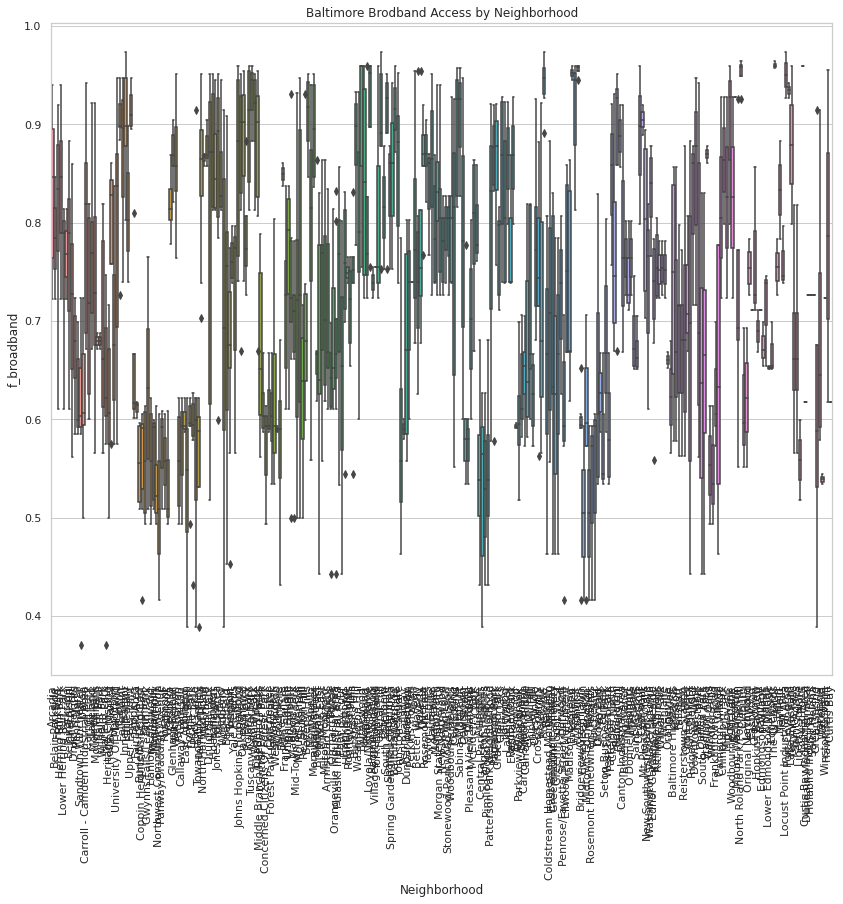

In [83]:
whisker_plots(baltimore_df, 'Name', 'Baltimore Brodband Access by Neighborhood')
plt.savefig('/tmp/data/neighborhood-data/visuals/baltimore_whisker_plot.png')